# Importing Libraries

In [12]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [13]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\sanja\OneDrive\Desktop\Final Year Projecct\Plant_Disease_Prediction\Dataset\Plant_Disease_Dataset\valid",
    labels="inferred",
    label_mode="categorical",
    image_size=(128, 128),
    batch_size=1,
    shuffle=False
)

class_names = test_set.class_names


Found 17572 files belonging to 38 classes.


In [14]:
import os
import tensorflow as tf

# Load dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\sanja\OneDrive\Desktop\Final Year Projecct\Plant_Disease_Prediction\Dataset\Plant_Disease_Dataset\valid",
    labels="inferred",
    label_mode="categorical",
    image_size=(128, 128),
    batch_size=1,
    shuffle=False
)

# Extract original class names
original_class_names = test_set.class_names

# Function to remove plant names
def clean_class_name(class_name):
    return "___".join(class_name.split("___")[1:])  # Removes the first part (plant name)

# Apply function to get cleaned class names
cleaned_class_names = [clean_class_name(name) for name in original_class_names]

print("Original Class Names:", original_class_names)
print("Cleaned Class Names:", cleaned_class_names)


Found 17572 files belonging to 38 classes.
Original Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'To

# Loading Model

In [15]:
# cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')


#Visualising and Performing Prediction on Single image

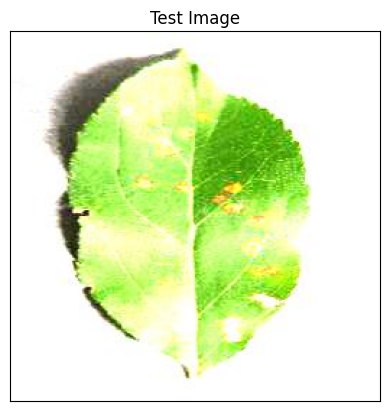

In [16]:
import cv2
import matplotlib.pyplot as plt
import os

image_path = r"C:\Users\sanja\OneDrive\Desktop\Final Year Projecct\Plant_Disease_Prediction\Dataset\Plant_Disease_Dataset\test\test\AppleCedarRust1.JPG"

# Check if file exists before reading
if not os.path.exists(image_path):
    print("Error: Image file not found at the specified path.")
else:
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to load image.")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Display the image
        plt.imshow(img)
        plt.title('Test Image')
        plt.xticks([])
        plt.yticks([])
        plt.show()


## Testing Model

In [17]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 262ms/step


In [18]:
print(predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [19]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

32


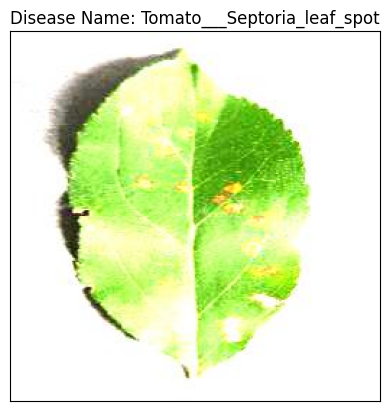

In [21]:
class_name = test_set.class_names  # Ensure class names are available
model_prediction = class_name[result_index]  # Use correct index

plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
